<a href="https://colab.research.google.com/github/TomFrederik/lucent/blob/dev/notebooks/Lucent_%2B_torchvision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Licensed under the Apache License, Version 2.0 (the "License");

In [2]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Lucent + torchvision

A demonstration of how Lucent works with different pretrained models and provides some samples of visualizations on other models.

## Install, Import

In [3]:
!pip install --quiet git+https://github.com/TomFrederik/lucent.git

     |████████████████████████████████| 225 kB 5.3 MB/s 


In [4]:
import torch

from lucent.optvis import render, param, transform, objectives
from lucent.model_utils import get_model_layers

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## InceptionV1

In nearly all of the notebooks here, we will be using InceptionV1, which has been noted to have ["unusually semantically meaningful"](https://distill.pub/2018/building-blocks/) neurons.

In [7]:
from torchvision.models import googlenet

inceptionv1_model = googlenet(pretrained=True)
_ = inceptionv1_model.to(device).eval()

Use `get_model_layers` to retrieve all the model layers.


In [28]:
# Print the first 20 layer names
get_model_layers(googlenet_model)[0][:20]

['conv1',
 'conv1->conv',
 'conv2',
 'conv2->conv',
 'conv3',
 'conv3->conv',
 'inception3a',
 'inception3a->branch1',
 'inception3a->branch1->conv',
 'inception3a->branch2->0',
 'inception3a->branch2->0->conv',
 'inception3a->branch2->1',
 'inception3a->branch2->1->conv',
 'inception3a->branch3->0',
 'inception3a->branch3->0->conv',
 'inception3a->branch3->1',
 'inception3a->branch3->1->conv',
 'inception3a->branch4->1',
 'inception3a->branch4->1->conv',
 'inception3b']

100%|██████████| 512/512 [00:17<00:00, 29.06it/s]



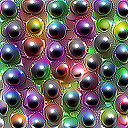

In [19]:
_ = render.render_vis(googlenet_model, "inception4a:107", show_inline=True)

We can also directly optimize for any particular output label. Just make sure that your final layer outputs logits and not probabilities (i.e. your final layer should be a linear layer and not a softmax):

100%|██████████| 512/512 [00:23<00:00, 21.38it/s]



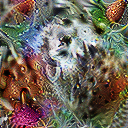

In [30]:
# Try optimizing for the strawberry label
_ = render.render_vis(googlenet_model, "labels:949", show_inline=True)

100%|██████████| 512/512 [00:42<00:00, 11.96it/s]



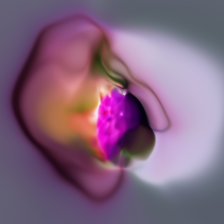

In [21]:
# Optimizing for strawberries with CPPN
_ = render.render_vis(googlenet_model, "labels:949", cppn_param_f, cppn_opt, show_inline=True)

## ResNet50

In [12]:
from torchvision.models import resnet50

resnet50_model = resnet50(pretrained=True).to(device).eval()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [29]:
# Print the first 20 layer names
get_model_layers(resnet50_model)[0][:20]

['conv1',
 'layer1->0',
 'layer1->0->conv1',
 'layer1->0->conv2',
 'layer1->0->conv3',
 'layer1->0->downsample->0',
 'layer1->1',
 'layer1->1->conv1',
 'layer1->1->conv2',
 'layer1->1->conv3',
 'layer1->2',
 'layer1->2->conv1',
 'layer1->2->conv2',
 'layer1->2->conv3',
 'layer2->0',
 'layer2->0->conv1',
 'layer2->0->conv2',
 'layer2->0->conv3',
 'layer2->0->downsample->0',
 'layer2->1']

100%|██████████| 512/512 [00:32<00:00, 15.66it/s]



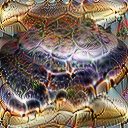

In [14]:
# render_vis works in the same way! Just substitute the appropriate layer name!
_ = render.render_vis(resnet50_model, "layer4_1_conv1:121", show_inline=True)

Again we can optimize directly for the strawberry label, because we have direct access to the logits! You can check to see that the last layer in the model is a linear layer and not a softmax.

100%|██████████| 512/512 [00:35<00:00, 14.48it/s]



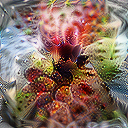

In [15]:
# Try to activate the strawberry label (949 for usual ImageNet mapping)
_ = render.render_vis(resnet50_model, "labels:949", show_inline=True)

100%|██████████| 512/512 [00:59<00:00,  8.56it/s]



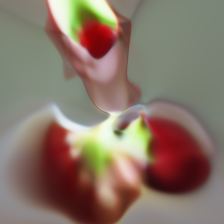

In [16]:
# Try to activate the strawberry label using CPPN parameterization
cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model, "labels:949", cppn_param_f, cppn_opt, show_inline=True)

## MobileNetV2

Let's pick a lightweight one for the last example!

In [23]:
from torchvision.models import mobilenet_v2

mobilenet_v2_model = mobilenet_v2(pretrained=True).to(device).eval()

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

In [24]:
# Again print out first 20 layers
get_model_layers(mobilenet_v2_model)[0][:20]

['features->0->0',
 'features->1',
 'features->1->conv->0->0',
 'features->1->conv->1',
 'features->2',
 'features->2->conv->0->0',
 'features->2->conv->1->0',
 'features->2->conv->2',
 'features->3',
 'features->3->conv->0->0',
 'features->3->conv->1->0',
 'features->3->conv->2',
 'features->4',
 'features->4->conv->0->0',
 'features->4->conv->1->0',
 'features->4->conv->2',
 'features->5',
 'features->5->conv->0->0',
 'features->5->conv->1->0',
 'features->5->conv->2']

100%|██████████| 512/512 [00:18<00:00, 27.42it/s]



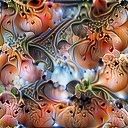

In [25]:
_ = render.render_vis(mobilenet_v2_model, "features_15:45", show_inline=True)

100%|██████████| 512/512 [00:19<00:00, 26.43it/s]



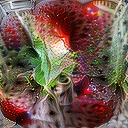

In [26]:
# More strawberries!
_ = render.render_vis(mobilenet_v2_model, "labels:949", show_inline=True)

100%|██████████| 512/512 [00:29<00:00, 17.34it/s]



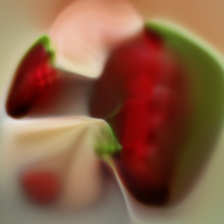

In [27]:
# One last strawberry
_ = render.render_vis(mobilenet_v2_model, "labels:949", cppn_param_f, cppn_opt, show_inline=True)

## Try it with other models from `torchvision`!